Data parallelism is a way to process multiple data batches across multiple devices simultaneously to achieve better performance. This code utilises parallelism in pytorch implicitely through the basic tensor operations it uses such as torch.stack and torch.cat however for this simplistic Cantor Set, there is no code required to directly exploit the parallelism capabilities of pytorch in order to generate the desired fractal.

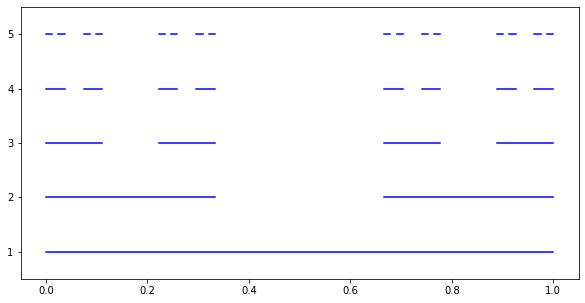

In [4]:
import torch
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def cantor_set(n_iterations):

    # A segment is represented by two numbers: the start and the end.
    segments = torch.tensor([[0.0, 1.0]])

    # This list will hold the segments for all iterations.
    all_segments = [segments]

    for _ in range(n_iterations):
        
        # Calculate the length of each segment by subtracting the starting point from the end point.
        lengths = segments[:, 1] - segments[:, 0]
        
        # Calculate the left third of each segment. (ends where the middle third begins.)
        left_segments = torch.stack([segments[:, 0], segments[:, 0] + lengths / 3], dim=1)

        # Calculate the right third of each segment. (starts where the middle third ends.)
        right_segments = torch.stack([segments[:, 1] - lengths / 3, segments[:, 1]], dim=1)
        
        # Combine the left and right segments to get the new set of segments for the next iteration.
        segments = torch.cat([left_segments, right_segments], dim=0)
        
        # Append the segments of this iteration to the list.
        all_segments.append(segments)

    return all_segments

def plot_cantor_set(all_segments):
    fig, ax = plt.subplots(figsize=(10, 5))
    
    for i, segments in enumerate(all_segments):

        for segment in segments:
            ax.plot(segment, [i+1, i+1], color='b')  # i+1 is the y-level, so iterations don't overlap.

        # Ensure the y-limits cover all iterations.
        ax.set_ylim(0.5, len(all_segments) + 0.5)
    plt.show()

all_segments = cantor_set(4)

plot_cantor_set(all_segments)
